# Coin Detection, preocessing and Counting


## Image reading and format conversion

<class 'numpy.ndarray'>
(298, 575, 3)
uint8


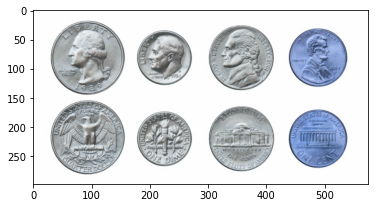

In [ ]:
# Import Image and plot in default format

import cv2
import numpy as np
from matplotlib import pyplot as plt

coin_image = cv2.imread('/Users/ahtshamzafar/Desktop/coin_image.jpeg')
print(type(coin_image))
print(coin_image.shape)
print(coin_image.dtype)
plt.imshow(coin_image)

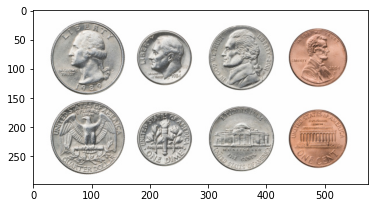

In [ ]:
# Conversion in RGB format
BGR = cv2.cvtColor(coin_image, cv2.COLOR_BGR2RGB)
plt.imshow(BGR)

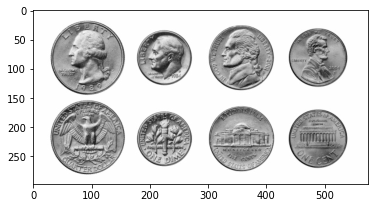

In [ ]:
# Conversion in Gray Format 
GRAY = cv2.cvtColor(coin_image, cv2.COLOR_BGR2GRAY)
plt.imshow(GRAY,cmap='gray')

## Transformations on BGR(Input) Image

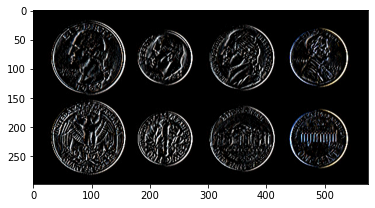

In [ ]:
# Sobel verticle egde detector 
kernel1 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
sharpen = cv2.filter2D(src=coin_image, ddepth=-1, kernel=kernel1)
plt.imshow(sharpen)


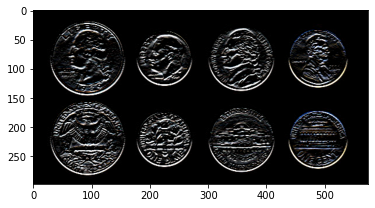

In [ ]:
# Sobel horizontal egde detector 
kernel1 = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
sharpen = cv2.filter2D(src=coin_image, ddepth=-1, kernel=kernel1)
plt.imshow(sharpen)


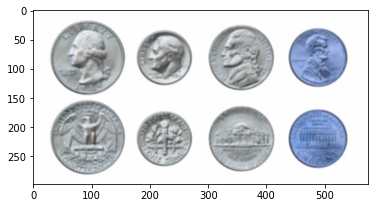

In [ ]:
# Blur filter

kernel1 = np.array([[1/9, 1/9, 1/9],
                    [1/9, 1/9, 1/9],
                    [1/9, 1/9, 1/9]])
sharpen = cv2.filter2D(src=coin_image, ddepth=-1, kernel=kernel1)
plt.imshow(sharpen)


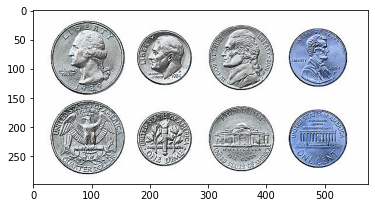

In [ ]:
# Sharpen filter

kernel1 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
sharpen = cv2.filter2D(src=coin_image, ddepth=-1, kernel=kernel1)
plt.imshow(sharpen)

## Coin detection and counting

Number of coins in the image:  8


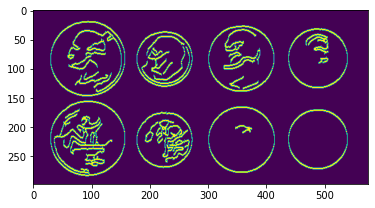

In [ ]:
# Steps
# Apply blur filer to remove noise
# Use canny edge detector to make contours
# Use dilated function to improve contours
# Find contours from previous dilated contour image
# Convert default BGR image to RBG 
# Use contours from findcontouurs and RGB image to draw contours
# Number of contours will be the number of coins

blur = cv2.GaussianBlur(GRAY, (11,11), 0)
canny = cv2.Canny(blur, 30, 150, 3)
dilated = cv2.dilate(canny, (1,1), iterations = 2)
(cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(coin_image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0), 2)
print('Number of coins in the image: ', len(cnt))
plt.imshow(rgb)
plt.imshow(dilated)

## Video based counting (created using multiple frames of same image)

Number of coins in the image:  8


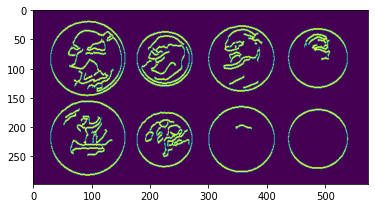

In [ ]:
cap = cv2.VideoCapture('/Users/ahtshamzafar/Desktop/coinvideo_3.mp4')
ret, img = cap.read()
gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur1 = cv2.GaussianBlur(gray1, (11,11), 0)
canny1 = cv2.Canny(blur1, 30, 150,3)
dilated1 = cv2.dilate(canny1, (1,1), iterations = 2)
(cnt1, heirarchy) = cv2.findContours(dilated1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print('Number of coins in the image: ', len(cnt1))
plt.imshow(dilated1)
#ret1, mask1 = cv2.threshold(canny1, 70, 255, cv2.THRESH_BINARY)
#cv2.imshow('coinvideo', mask1)